## Main figures
## Figure 2: Land cover map for the regional ESDL 

### Estupinan-Suarez, et al. (2021). A Regional Earth System Data Lab for Understanding Ecosystem Dynamics: An Example from Tropical South America. Front. Earth Sci. 9:613395. doi: 10.3389/feart.2021.613395
#### Correspondence to: lestup@bgc-jena.mpg.de, linamaesu@gmail.com
#### GitHub repository: https://github.com/linamaes/Regional_ESDL

This script does the following:
- Loads land cover data from the European Space Agency (ESA) map in 2014

About the notebook
- It is written in Julia 1.3
- "#" comments in the code are intended to explain specific aspects of the coding
- New steps in workflows are introduced with bold headers

March 2021, Max Planck Institute for Biogeochemistry, Jena, Germany

## Load packages

In [1]:
using ESDL

In [2]:
using ESDLPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5824290163892036288\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3523672868436522111\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5824290163892036288\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Load data

In [3]:
pathin = "/my_path/.../"

"/my_path/.../"

In [5]:
clc = loadCube(string(pathin, "ESA_LC/ColombiaLCCube_high.zarr/"))

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Year                Axis with 16 Elements from 2000.0 to 2015.0
Total size: 283.01 MB


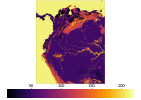

In [6]:
plotMAP(clc, year=2014)

## Transform land cover data from Unit8 to Integer

In [7]:
function unit8dataFx(xout, xin)
    xout .= Int.(xin)
    #return xout
end

unit8dataFx (generic function with 1 method)

In [8]:
indims = InDims("Lon","Lat")
outdims = OutDims("Lon","Lat",outtype=Int)

OutDims((ESDL.Cubes.Axes.ByName("Lon"), ESDL.Cubes.Axes.ByName("Lat")), (), zero, identity, :auto, false, AsArray(), :input, Zarr.NoCompressor(), "", false, Int64)

In [9]:
clcyear = mapCube(unit8dataFx, clc[Year=2014], indims = indims, outdims = outdims)

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 79.6 MB


In [10]:
# Add legend to data
clcyear.properties["labels"]=include(string(pathin,"ESA_LC/legend/ESALClegend.jl"))

Dict{Float32,String} with 22 entries:
  50.0  => "Tree cover, broadleaved, evergreen, closed to open (>15%)"
  80.0  => "Tree cover, needleleaved, deciduous, closed to open (>15%)"
  190.0 => "Urban areas"
  210.0 => "Water bodies"
  0.0   => "No Data"
  160.0 => "Tree cover, flooded, fresh or brakish water"
  170.0 => "Tree cover, flooded, saline water"
  60.0  => "Tree cover, broadleaved, deciduous, closed to open (>15%)"
  150.0 => "Sparse vegetation (tree, shrub, herbaceous cover)(<15%)"
  90.0  => "Tree cover, mixed leaf type (broadleaved and needleleaved)"
  20.0  => "Cropland, irrigated or post‐flooding"
  120.0 => "Shrubland"
  70.0  => "Tree cover, needleleaved, evergreen, closed to open (>15%)"
  200.0 => "Bare areas"
  100.0 => "Mosaic tree shrub herbaceous cover"
  140.0 => "Lichens and mosses"
  10.0  => "Cropland, rainfed"
  180.0 => "Shrub or herbaceous cover, flooded, fresh/saline/brakish water"
  130.0 => "Grassland"
  202.0 => "Unconsolidated bare areas"
  220.0 => "P

In [11]:
# colors differ from the map shown in the refered publication (figure 2)
plotMAP(clcyear)